<a href="https://colab.research.google.com/github/Sandhyasandy146/CODSOFT/blob/main/ipl_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


In [4]:
ipl = pd.read_csv('ipl_dataset.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [6]:
X = df.drop(['total'], axis =1)
y = df['total']


In [7]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [8]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


In [11]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 55.9685 - val_loss: 22.2286
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 22.3827 - val_loss: 22.0401
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.2581 - val_loss: 22.0573
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 22.0809 - val_loss: 22.3860
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2097 - val_loss: 21.9133
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.1868 - val_loss: 21.8727
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 22.2180 - val_loss: 21.8692
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 22.2164 - val_loss: 22.4115
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 22.1189 - val_loss: 21.8014
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.2113 - val_loss: 21.8722
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 21.9996 - val_loss: 21.7675
Epoch 12/50
832/832 ━━━━

<Axes: >

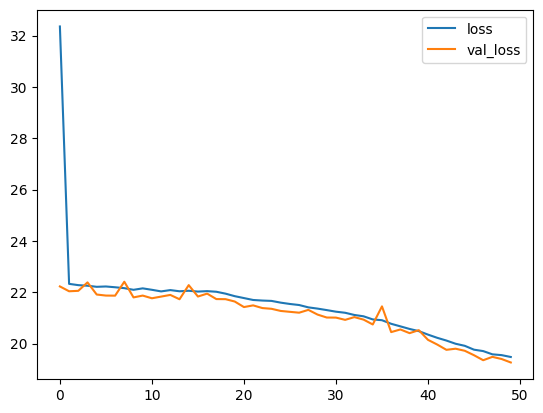

In [12]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [13]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


19.75952911376953

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data preprocessing (Ensure proper scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a better neural network architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # More neurons
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the model with a lower learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    epochs=100, batch_size=32,  # More epochs, smaller batch size
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping])

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5329.0894 - val_loss: 864.6904
Epoch 2/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1053.4137 - val_loss: 853.6168
Epoch 3/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1020.1808 - val_loss: 830.1318
Epoch 4/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1004.9155 - val_loss: 894.1066
Epoch 5/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 982.3658 - val_loss: 809.0051
Epoch 6/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 989.9744 - val_loss: 813.6865
Epoch 7/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 960.4755 - val_loss: 817.9437
Epoch 8/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 951.8404 - val_loss: 852.2750
Epoch 9/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 958.7265 - val_loss: 808.2720
Epoch 10/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 946.8410 - val_loss: 817.6315
Epoch 11/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss:

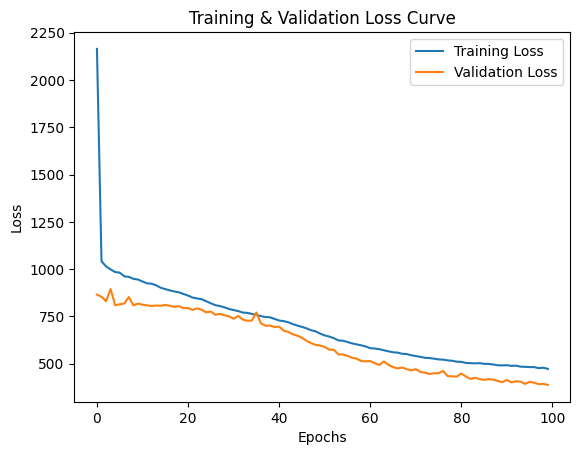

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss Curve')
plt.show()


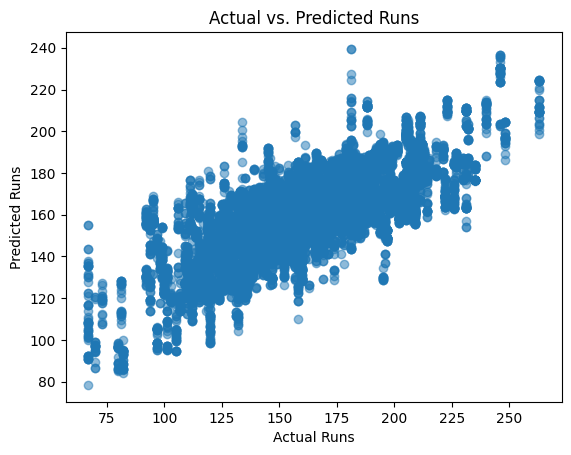

In [17]:
import numpy as np

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual vs. Predicted Runs")
plt.show()


In [18]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


14.797080993652344

In [19]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [20]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()